# House Prices - Preprocessing Data


## Preparation

### Import necessary libraries

In [209]:
import os
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

### Load train.csv file

In [210]:

data_path = os.path.join("..", "..", "data")
house = pd.read_csv(os.path.join(data_path, "raw", "train.csv"))
df = house.copy()
test_dataset = house = pd.read_csv(os.path.join(data_path, "raw", "test.csv"))
df_test = house.copy()

print("Successfully load training data.")
df.head()

print("Successfully saved preprocessed data.")

Successfully load training data.
Successfully saved preprocessed data.


In [211]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [212]:
# Kiểm tra missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])

Missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [213]:
# Kiểm tra missing values
missing = df_test.isnull().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])

Missing values:
 PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
MasVnrType       894
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageFinish      78
GarageQual        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
Exterior1st        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
SaleType           1
KitchenQual        1
GarageCars         1
GarageArea         1
Exterior2nd        1
dtype: int64


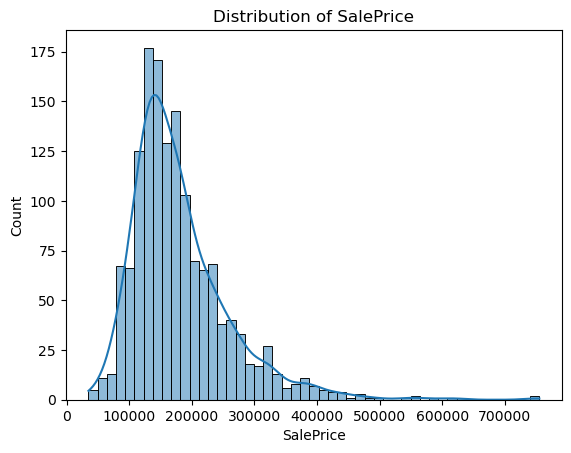

In [214]:
# Phân phối target
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [215]:
print("===== Number of missing values (train dataset) =====\n")
print(df.isnull().sum()[df.isnull().sum() > 0])

print('\n')

print("===== Number of missing values (test dataset) =====\n")
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])


===== Number of missing values (train dataset) =====

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


===== Number of missing values (test dataset) =====

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType       

Tập train và test có dùng số lượng dữ liệu missing 

## Handle missing value

### Categorical features

Danh sách none_cols chứa các categorical features (kiểu object/string) mà:

- NaN sẽ chuyển đổi về 'None', vì địa điểm không có feature này.

In [216]:
def handle_missing_values(df):
    
    
    none_cols = [
        'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
        'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'MasVnrType'
    ]
    for col in none_cols:
        if col in df.columns:
            df[col] = df[col].fillna('None')
            
    return df        

- Các cột categorical còn lại: điền mode.

In [217]:
def handle_missing_values(df):
    
   
    cat_cols_with_missing = df.select_dtypes(include=['object']).columns[
        df.select_dtypes(include=['object']).isnull().any()
    ]
    for col in cat_cols_with_missing:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

### Number features

Điền `0` cho các cột số khi thiếu dữ liệu là hợp lý vì:

- Các cột này biểu diễn số lượng/diện tích.

- Thiếu dữ liệu = thực tế không có.


In [218]:
def handle_missing_values(df):
     
    
    zero_cols = [
        'GarageYrBlt', 'GarageArea', 'GarageCars',
        'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
        'MasVnrArea'
    ]
    for col in zero_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    return df

- Các cột numerical còn lại (hiếm): điền median

In [219]:
def handle_missing_values(df):
     
    num_cols_with_missing = df.select_dtypes(include=['int64', 'float64']).columns[
        df.select_dtypes(include=['int64', 'float64']).isnull().any()
    ]
    for col in num_cols_with_missing:
        df[col] = df[col].fillna(df[col].median())

    return df

### LotFrontage features

Là chiều dài mặt tiền lô đất (đơn vị feet) tiếp giáp với đường:
- Lô đất lớn hơn thì mặt tiền rộng hơn
- Lô đất trong khu cao cấp (Neighborhood tốt) thường có mặt tiền rộng hơn

In [220]:
def handle_missing_values(df):
    
    if 'LotFrontage' in df.columns:
        df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
            lambda x: x.fillna(x.median())
        )
        # Nếu vẫn còn missing (Neighborhood hiếm), điền median toàn cục
        df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

    return df

In [221]:
# Hàm kiểm tra missing
def missing_report(df, name="DataFrame"):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_percent
    }).sort_values(by='Missing Count', ascending=False)
    missing_df = missing_df[missing_df['Missing Count'] > 0]
    print(f"\n=== Missing Values in {name} ===")
    print(missing_df)
    return missing_df

missing_train = missing_report(df, "Train")
missing_test = missing_report(df_test, "Test")


=== Missing Values in Train ===
              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageQual               81   5.547945
GarageFinish             81   5.547945
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
BsmtFinType1             37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493

=== Missing Values in Test ===
              Missing Count  Missing %
PoolQC                 1456  99.794380
MiscFeature            1408  96.504455
Alley                  1352  92.666210

We need to find solutions to handle missing value.
From the output detecting missing value, here's the proportion of missing value for `Alley`, `MasVnrType`, and `PoolQC`vv.. in train dataset and test dataset.

- Alley: 93.77%
- MasVnrType: 59.73%
- BsmtExposure: 2.60%
- BsmtFinType1: 2.53%
- BsmtFinType2: 2.60%
- Electrical: 0.07%
- FireplaceQu: 47.26%
- GarageType: 5.55%
- GarageFinish: 5.55%
- GarageQual: 5.55%
- GarageCond: 5.55%
- PoolQC: 99.52%
- Fence: 80.75%
- MiscFeature: 96.30%
- LotFrontage: 17.74%
- MasVnrArea: 0.55%
- BsmtQual: 2.53%
- BsmtCond: 2.53%
- GarageYrBlt: 5.55%

For `Alley` features, it could related to type of alley access, Most of the houses in the dataset do not have an alley behind them ,the missing value actually means “no alley”.

For `PoolQC` features, it could related to Pool quality, 99.52% of houses don't have swimming pools, so this school is almost completely lacking.

For `Fence` features, it could related to Fence quality, Most houses in the dataset do not have fences around their yards, so there is no data.

For `MiscFeature` features, it could related to  Miscellaneous feature not covered in other categories, most houses do not have any special amenities, so the dataset is missing.

These columns are logically identical to Alley, PoolQC, Fence and MiscFeature

`FireplaceQu`,`GarageType`,`GarageFinish`,`GarageQual`,
>
`GarageCond`,`BsmtExposure`,`BsmtFinType1`,
>
`BsmtFinType2`,`BsmtQual`,`BsmtCond`

In [222]:
# Xử lý missing
df_clean = handle_missing_values(df)
df_test_clean = handle_missing_values(df_test)

# Kiểm tra lại
print("After handling missing:")
missing_report(df_clean, "Train Clean")
missing_report(df_test_clean, "Test Clean")

After handling missing:

=== Missing Values in Train Clean ===
              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
GarageType               81   5.547945
GarageQual               81   5.547945
GarageFinish             81   5.547945
GarageCond               81   5.547945
GarageYrBlt              81   5.547945
BsmtExposure             38   2.602740
BsmtFinType2             38   2.602740
BsmtQual                 37   2.534247
BsmtCond                 37   2.534247
BsmtFinType1             37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493

=== Missing Values in Test Clean ===
              Missing Count  Missing %
PoolQC                 1456  99.794380
MiscFeature            1408  96.504455
Alley                  1352  92.666210
Fe

,Missing Count,Missing %
PoolQC,1456,99.794380
MiscFeature,1408,96.504455
Alley,1352,92.666210
Fence,1169,80.123372
MasVnrType,894,61.274846
FireplaceQu,730,50.034270
GarageYrBlt,78,5.346127
GarageFinish,78,5.346127
GarageCond,78,5.346127
GarageQual,78,5.346127


### Feature Engineering (Cái này phân tích ra để hiểu sâu hơn có thể bỏ)

Trong bất động sản (đặc biệt ở Mỹ), nhà có nhiều diện tích porch (sân hiên) thường:

- Tăng giá trị gia tăng, vì dùng để thư giãn / BBQ / sinh hoạt gia đình

- Tược đánh giá cao ở những khu ngoại ô có khí hậu mát, thiên nhiên đẹp

In [223]:
def add_features(df):
    # Tổng diện tích ngoài trời
    df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
    return df
    

Giá nhà mới sẽ cao hơn khi được sử dụng nhiều:

In [224]:
def add_features(df):
    # Nhà mới?
    df['IsNew'] = (df['YearBuilt'] == df['YrSold']).astype(int)
    return df

Giá nhà rất quan tâm đến việc nhà có được sửa chữa hay chưa:
- Nhà đã cải tạo thường tăng giá trị vì chất lượng mới hơn, môi trường sống tốt hơn.
- Căn nhà không cải tạo từ lâu thì thường xuống cấp nên giá thấp hơn.

In [225]:
def add_features(df):
    # Có cải tạo không?
    df['IsRemodeled'] = (df['YearBuilt'] != df['YearRemodAdd']).astype(int)
    return df

Tuổi nhà (Age) ảnh hưởng lớn đến giá:

- Nhà mới thường có giá cao hơn.

- Nhà càng cũ thì giá giảm dần (trừ một số khu đắt, giá trị đất cao).

Sửa chữa gần đây (AgeRemod) là yếu tố nâng giá bán:
- Nhà cũ nhưng vừa được remodel gần đây thì giá sẽ cao

- Remodel cách đây lâu thì giá trả theo tuổi thực tế

In [226]:
def add_features(df):
    
    # Tuổi nhà
    df['Age'] = df['YrSold'] - df['YearBuilt']
    df['AgeRemod'] = df['YrSold'] - df['YearRemodAdd']
    return df

Tổng diện tích sàn sử dụng của căn nhà thì yếu tố dự đoán giá nhà rất mạnh

In [227]:
def add_features(df):
    
    # Tổng diện tích
    df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    return df

Trong ngành real estate (bất động sản) của Mỹ:
>
`FullBath` = 1.0 , `HalfBath` = 0.5
>
`BsmtFullBath` = 1.0 , `BsmtHalfBath` = 0.5

In [228]:
def add_features(df):
# Tổng phòng tắm
    df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    return df

In [229]:
df_clean = add_features(df_clean)
df_test_clean = add_features(df_test_clean)

## Detecting outliers

In [230]:
num_cols = [
    'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
    'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
    'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
    'MiscVal', 'MoSold', 'YrSold', 'SalePrice'
]

def detect_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = max(Q1 - factor * IQR, 0)  # Age cannot be negative
    upper_bound = Q3 + factor * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # print(f'{col} - Outliers (IQR): {len(outliers)}, Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}')
    return outliers, lower_bound, upper_bound


for col in num_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    print(f'Total outliers in {col}: {len(outliers)}')

Total outliers in MSSubClass: 103
Total outliers in LotArea: 69
Total outliers in OverallQual: 2
Total outliers in OverallCond: 125
Total outliers in YearBuilt: 7
Total outliers in YearRemodAdd: 0
Total outliers in BsmtFinSF1: 7
Total outliers in BsmtFinSF2: 167
Total outliers in BsmtUnfSF: 29
Total outliers in TotalBsmtSF: 61
Total outliers in 1stFlrSF: 20
Total outliers in 2ndFlrSF: 2
Total outliers in LowQualFinSF: 26
Total outliers in GrLivArea: 31
Total outliers in BsmtFullBath: 1
Total outliers in BsmtHalfBath: 82
Total outliers in FullBath: 0
Total outliers in HalfBath: 0
Total outliers in BedroomAbvGr: 35
Total outliers in KitchenAbvGr: 68
Total outliers in TotRmsAbvGrd: 30
Total outliers in Fireplaces: 5
Total outliers in GarageCars: 5
Total outliers in GarageArea: 21
Total outliers in WoodDeckSF: 32
Total outliers in OpenPorchSF: 77
Total outliers in EnclosedPorch: 208
Total outliers in 3SsnPorch: 24
Total outliers in ScreenPorch: 116
Total outliers in PoolArea: 7
Total outli

## Feature encoding

In [231]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3.5


In [232]:
df_final, df_test_final = df_final.align(df_test_final, join='outer', axis=1, fill_value=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalBath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,3.5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,3.5
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3.5


## Save file

We will save train and test files to use for the future

In [233]:
df.to_csv(os.path.join(data_path, "preprocessed", "preprocessed_train.csv"), index=False)
df_test.to_csv(os.path.join(data_path, "preprocessed", "preprocessed_test.csv"), index=False)
print("Successfully saved preprocessed data.")

Successfully saved preprocessed data.


# The end